In [18]:
#import warnings
import sys 

import pickle

sys.path.insert(0,'/zhome/94/5/127021/speciale/master_project')
from src.visualization.tcav_visual import plot_results

In [34]:
PATH = '/work3/s174498/nlp_tcav_results/'

with open(PATH+'positive_gender_layer_0_11.pkl','rb') as handle:
    data = pickle.load(handle)


/work3/s174498/nlp_tcav_results/figures/gender_concepts/
concept intersex
concept man
concept transsexual
concept woman
Now overwritting and saving figure


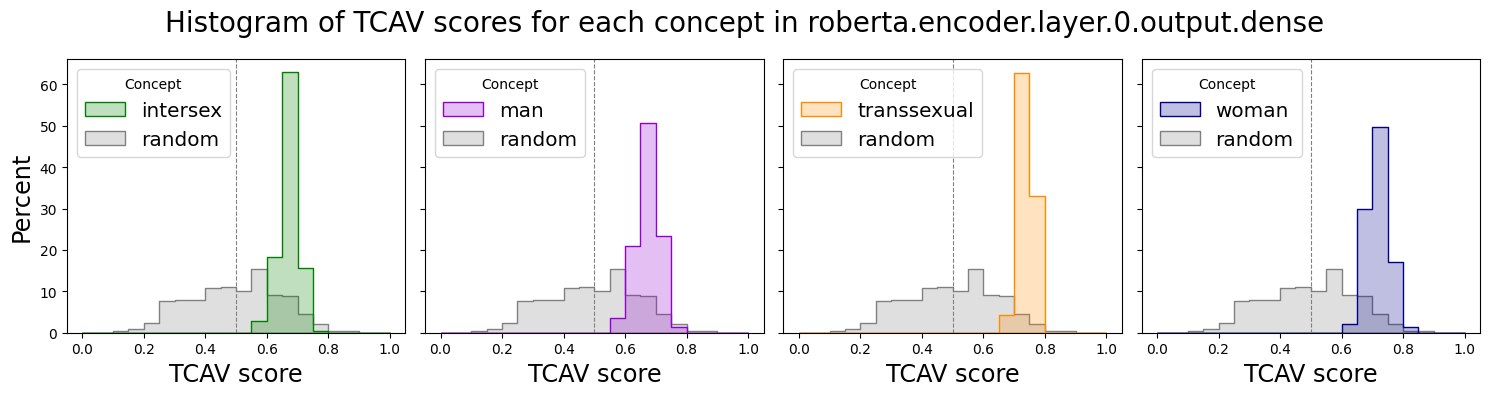

Now overwritting and saving figure


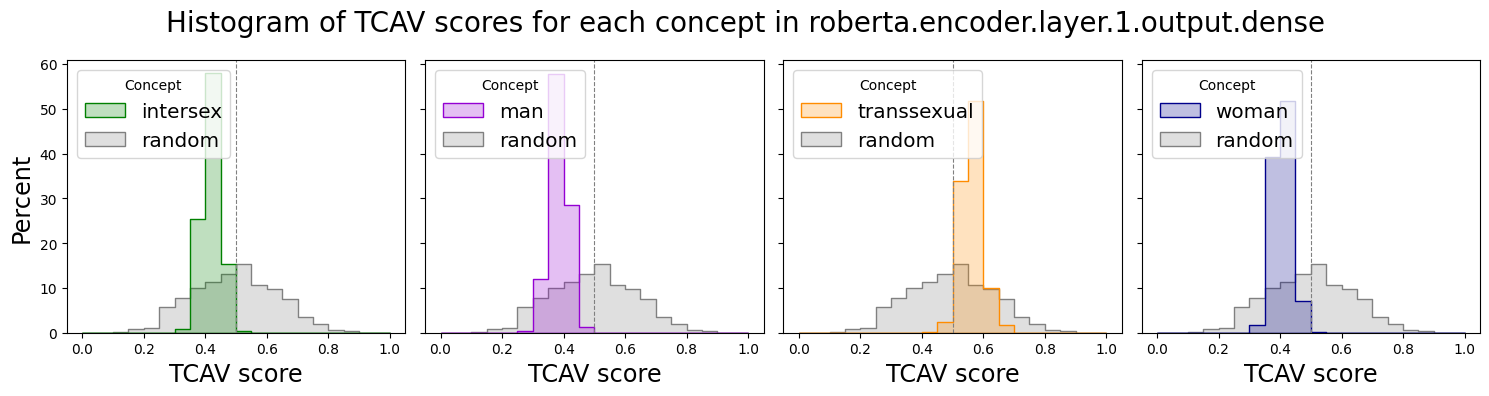

Now overwritting and saving figure


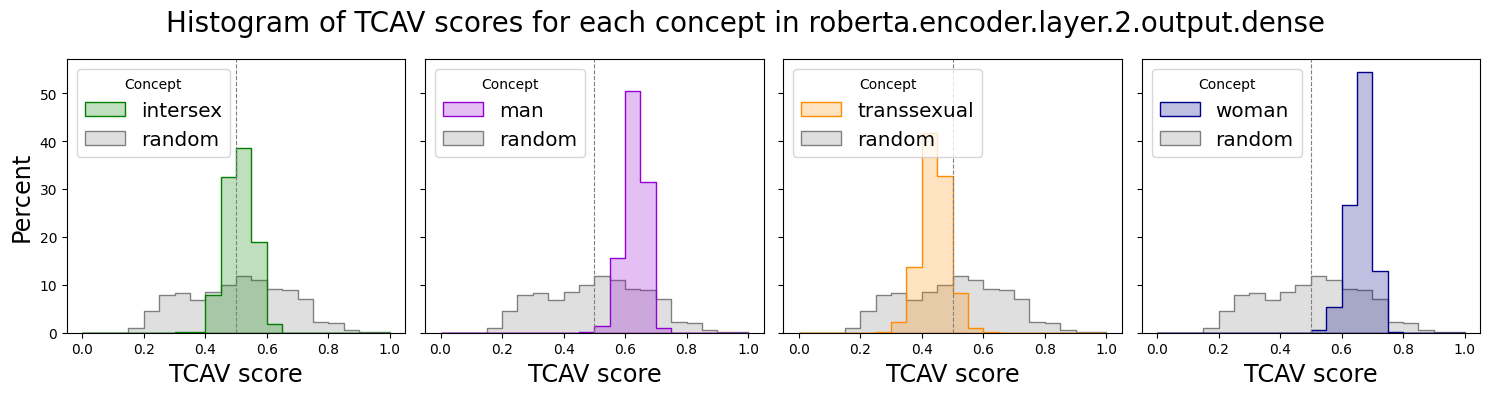

Now overwritting and saving figure


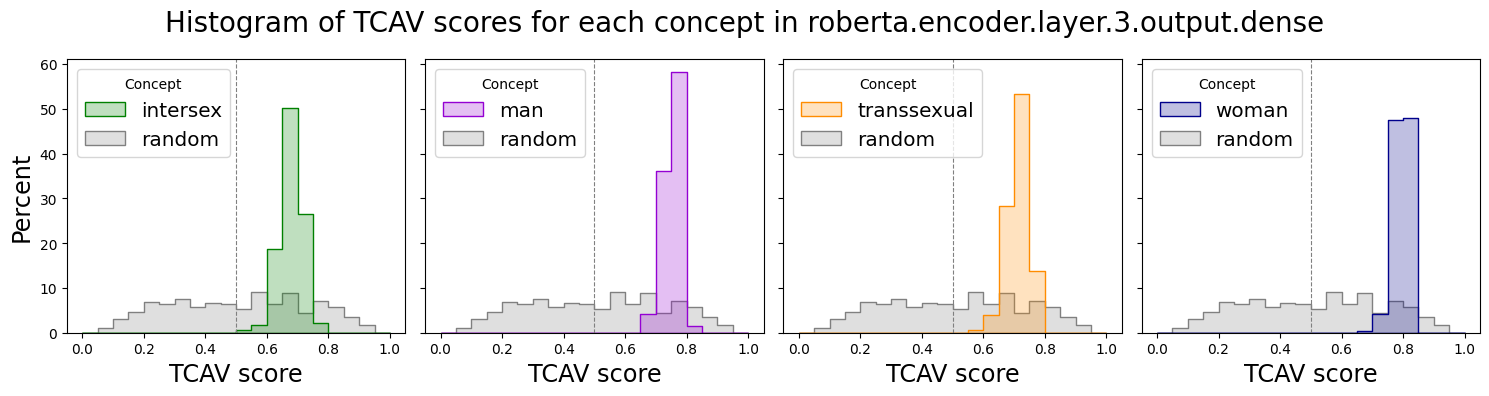

Now overwritting and saving figure


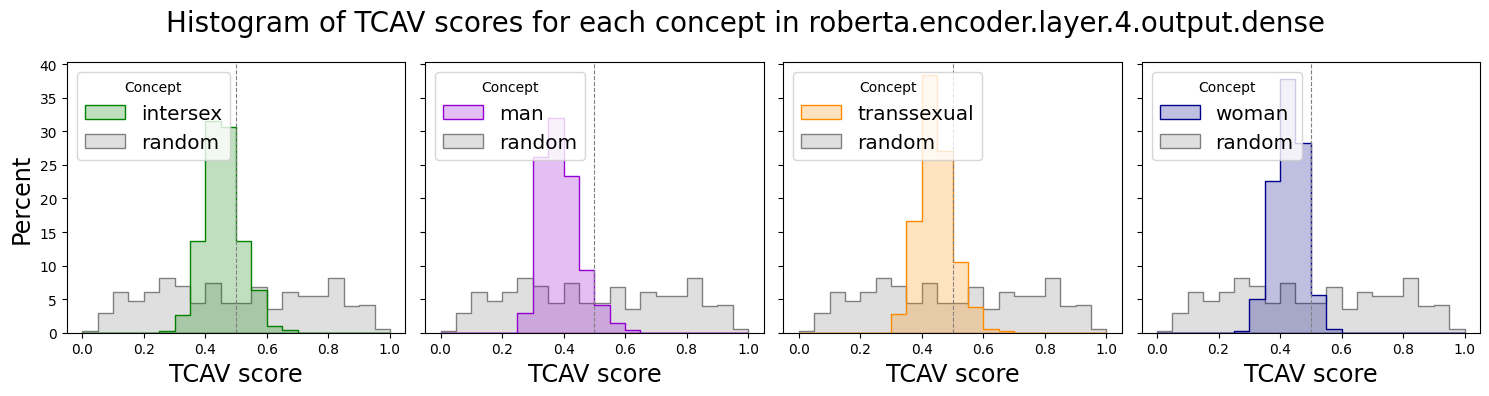

Now overwritting and saving figure


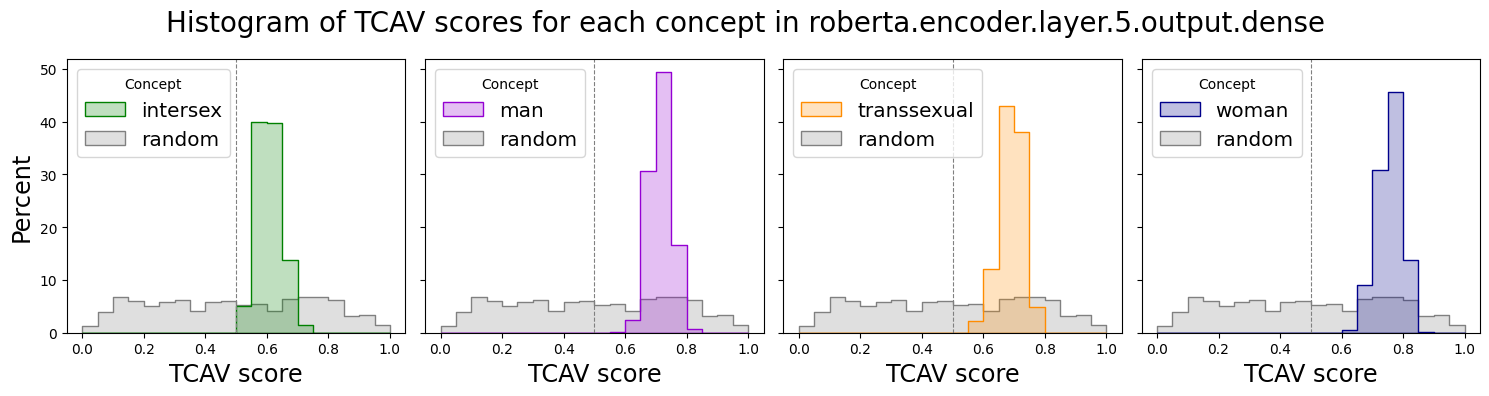

Now overwritting and saving figure


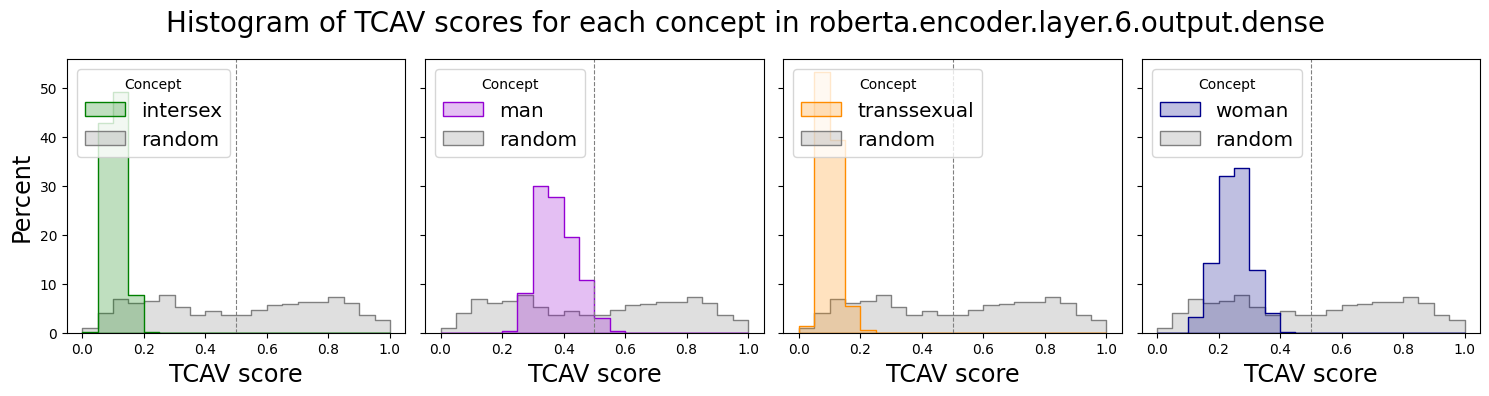

Now overwritting and saving figure


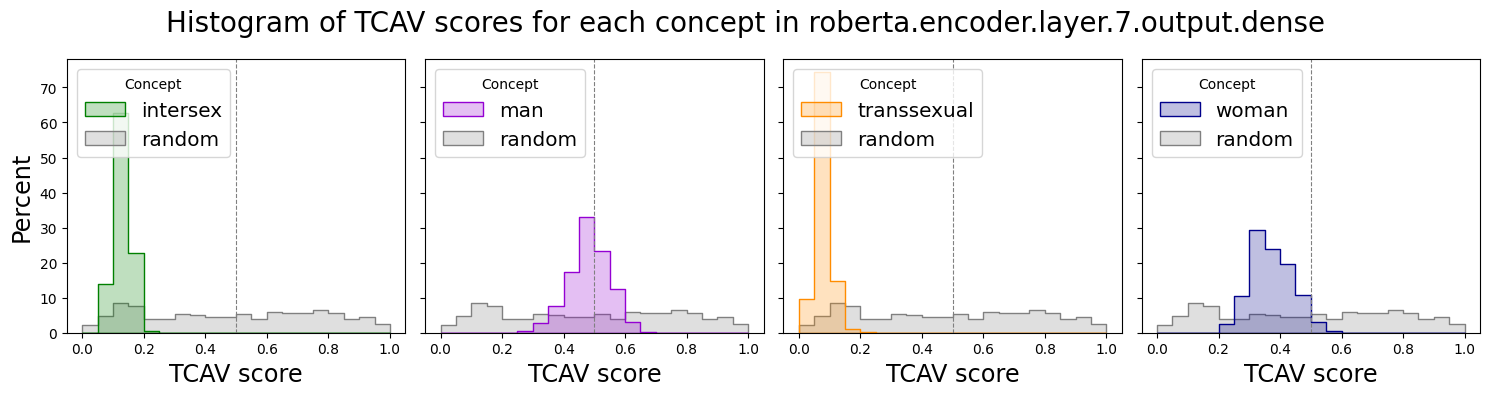

Now overwritting and saving figure


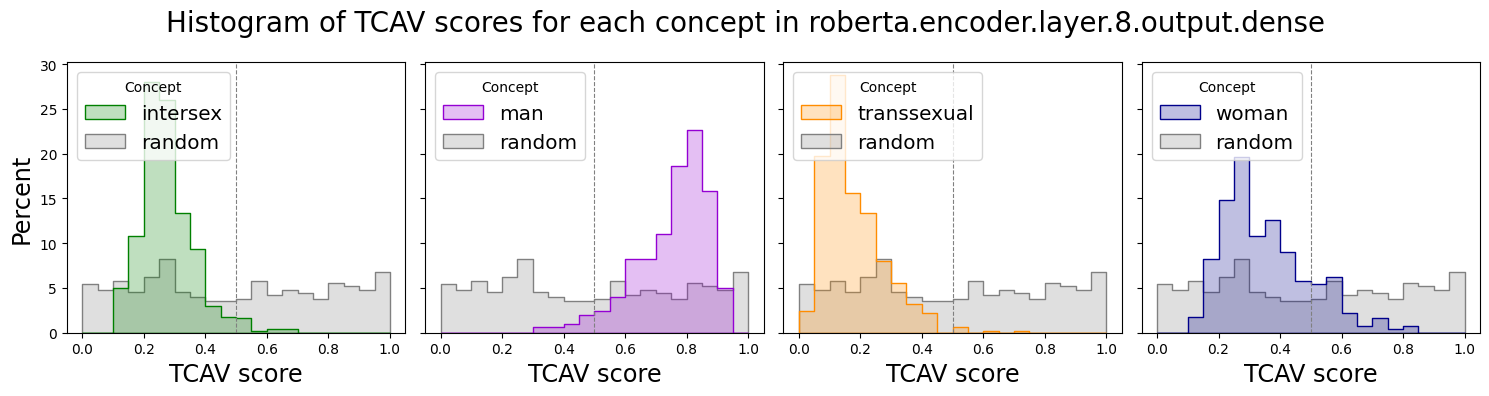

Now overwritting and saving figure


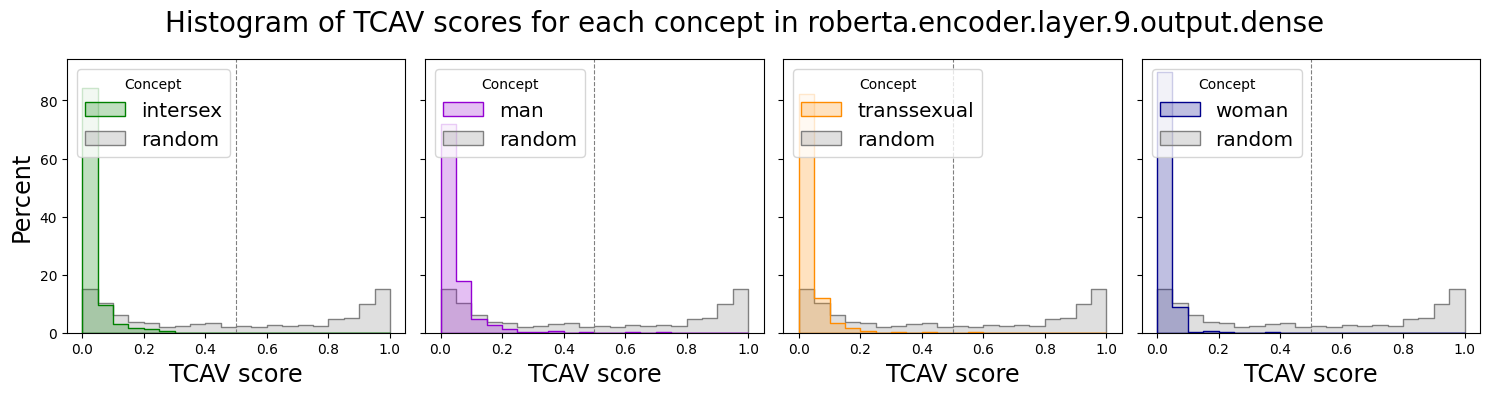

Now overwritting and saving figure


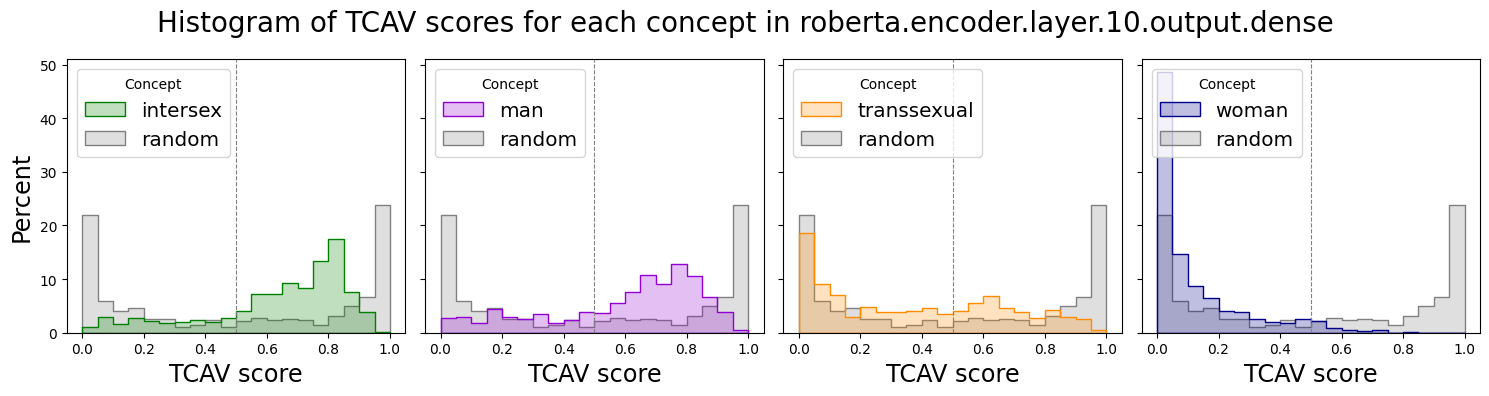

Now overwritting and saving figure


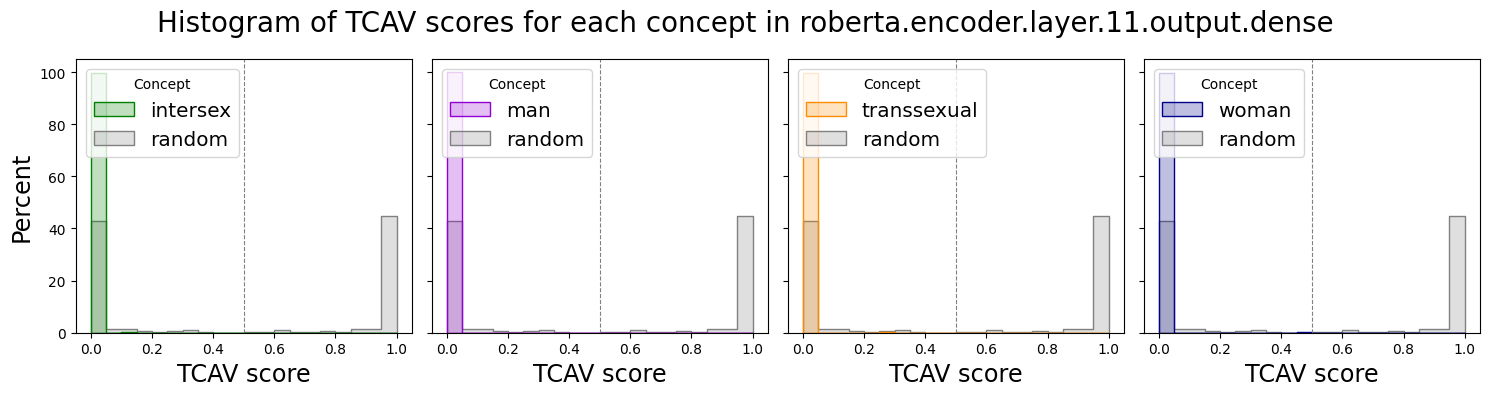

{'random_p-value': [0.50878, 0.47999898198966123], 'bn_vals': [0.0002666666666666667, 0.0, 0.0006133333333333334, 0.0009266666666666667], 'bn_stds': [0.005956882107650314, 0.0, 0.013260695473633516, 0.020700165324084842], 'significant': [True, True, True, True], 'p-value': [1.2708996783413085e-98, 1.0238644845932487e-98, 1.81114771142988e-98, 2.7497765693240125e-98], 'concept': ['intersex', 'man', 'transsexual', 'woman']}
num concepts 4
bn roberta.encoder.layer.0.output.dense
bn roberta.encoder.layer.1.output.dense
bn roberta.encoder.layer.2.output.dense
bn roberta.encoder.layer.3.output.dense
bn roberta.encoder.layer.4.output.dense
bn roberta.encoder.layer.5.output.dense
bn roberta.encoder.layer.6.output.dense
bn roberta.encoder.layer.7.output.dense
bn roberta.encoder.layer.8.output.dense
bn roberta.encoder.layer.9.output.dense
bn roberta.encoder.layer.10.output.dense
bn roberta.encoder.layer.11.output.dense
Now overwritting and saving figure


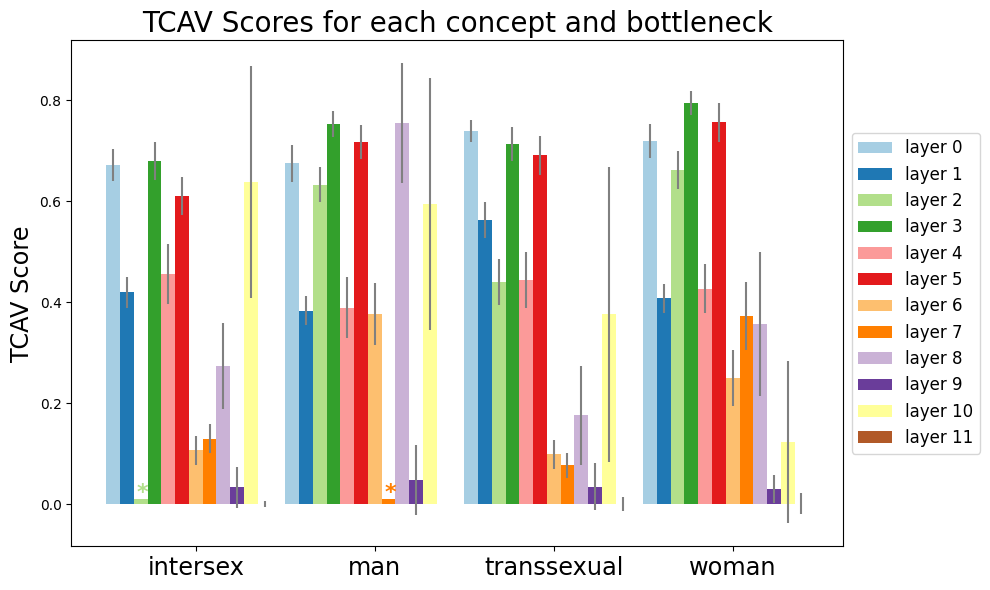

In [35]:
# comcepts 
# ['hate','irony','offensive'] 
# ['intersex','man','transsexual','woman']
# ['news','world','sport','business','science']
concepts = ['intersex','man','transsexual','woman']#['woman']
PATH =  '/work3/s174498/nlp_tcav_results/figures/gender_concepts/'
output = plot_results(data, 'positive', concepts ,PATH, plot_hist = True, save_fig =True, t_test_mean = None)

In [21]:
PATH = '/work3/s174498/nlp_tcav_results/'

with open(PATH+'positive_woman_layer_0_11.pkl','rb') as handle:
    data = pickle.load(handle)

In [22]:
import numpy as np 
np.mean(data['positive']['woman']['roberta.encoder.layer.11.output.dense']['TCAV'])

0.0009599999999999999

In [23]:
np.mean(data['positive']['random']['roberta.encoder.layer.11.output.dense']['TCAV'])

0.5085333333333334

(array([222.,   9.,   5.,   8.,   1.,   6.,   3.,   5.,   9., 232.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

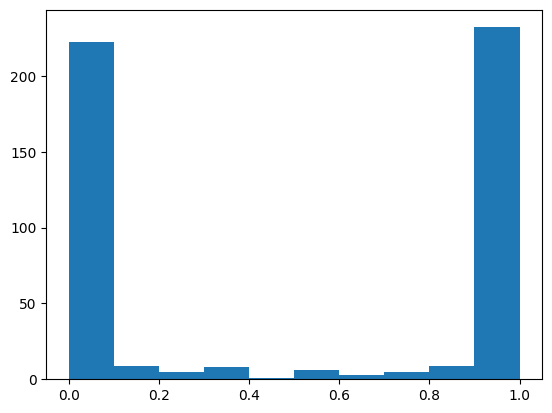

In [24]:
import matplotlib.pyplot as plt


plt.hist(data['positive']['random']['roberta.encoder.layer.11.output.dense']['TCAV'])

In [17]:
max(data['positive']['random']['roberta.encoder.layer.11.output.dense']['TCAV'])

0.5